In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import trefide.preprocess as preprocess
import scipy.io as io

In [3]:
# Load Data
stim = io.loadmat("../data/sampleMovie.mat")['stimulationSignal'][1:-50].squeeze()
data = io.loadmat("../data/post_demix.mat")
N, T = data['C'].shape
signals = data['C']

In [4]:
signals, trends, stim, disc_idx = preprocess.detrend(signals, stim, disc_idx=np.array([5]))

In [5]:
T = len(stim)
idx = np.random.randint(0, N)
signal = signals[idx,:]

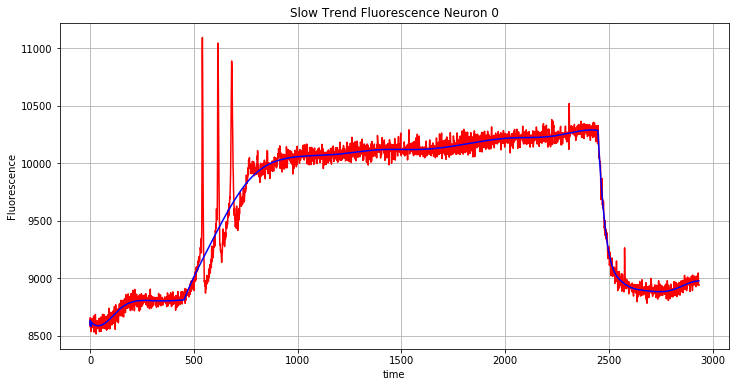

In [6]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(np.arange(T), signal+trends[idx,:], 'r')
ax.plot(np.arange(T), trends[idx,:], 'b')

ax.set(xlabel='time', ylabel='Fluorescence',
       title='Slow Trend Fluorescence Neuron {}'.format(idx))
ax.grid()

plt.show()

In [7]:
from trefide.solvers.admm import ladmm

In [8]:
outs = ladmm(signals[1,:].copy())

In [9]:
outs

(<MemoryView of 'ndarray' at 0x7fe929de0d88>,
 <MemoryView of 'ndarray' at 0x7fe929d8f048>,
 <MemoryView of 'ndarray' at 0x7fe929d8f1f0>,
 <MemoryView of 'ndarray' at 0x7fe929d8f398>,
 <MemoryView of 'ndarray' at 0x7fe929d8f540>,
 <MemoryView of 'ndarray' at 0x7fe929d8f6e8>)

In [10]:
betas = np.asarray(outs[0])

In [11]:
betas = betas.reshape(50,T)

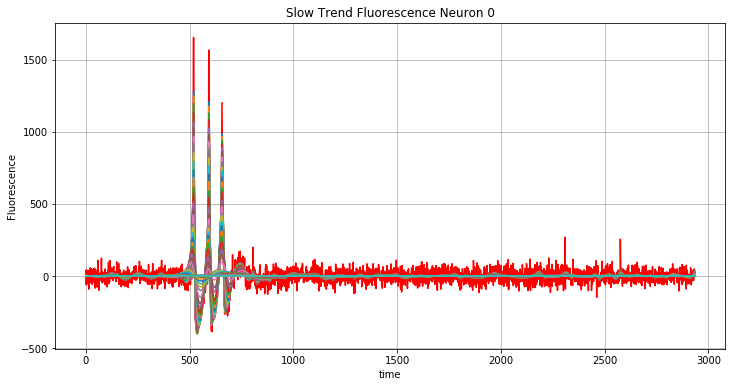

In [12]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(np.arange(T), signals[1,:], 'r')
for denoised in betas[-1::-1,:]:
    ax.plot(np.arange(T), denoised)

ax.set(xlabel='time', ylabel='Fluorescence',
       title='Slow Trend Fluorescence Neuron {}'.format(idx))
ax.grid()

plt.show()